# **Exploratory Data Analysis for Covid-19 data on India**

In [1]:
#importing the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

import warnings
warnings.filterwarnings('ignore')

In [2]:
#downloading the necessary files from google drive

!gdown --id 1OuzTrAMwiEHCfXymDmYI2YPBlOMpO9rs  #covid data set of India statewise stats
!gdown --id 1Tm4wUBG91Tv_bduJT4kA4Ikpe612Hmqm  #statewise vaccine data
!gdown --id 1bLxTx1n9dJQuHbXXNGlcbdh-KdTLW5Q4  #covid data of India

Downloading...
From: https://drive.google.com/uc?id=1OuzTrAMwiEHCfXymDmYI2YPBlOMpO9rs
To: /content/covid_19_india_statewise_stats.csv
100% 1.01M/1.01M [00:00<00:00, 15.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Tm4wUBG91Tv_bduJT4kA4Ikpe612Hmqm
To: /content/covid_vaccine_statewise.csv
100% 1.11M/1.11M [00:00<00:00, 17.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bLxTx1n9dJQuHbXXNGlcbdh-KdTLW5Q4
To: /content/COVID-19 Cases(16-11-2021).csv
100% 8.95k/8.95k [00:00<00:00, 7.42MB/s]


## A - Loading the dataset into pandas dataframe and analysing the variables



For the **overall India** data

In [3]:
df_ind=pd.read_csv('/content/covid_19_india_statewise_stats.csv')

#dropping the redundant columns
df_ind=pd.DataFrame(df_ind.replace(to_replace='Maharashtra***', value='Maharashtra')) #Correcting the data
df_ind=pd.DataFrame(df_ind.replace(to_replace='Madhya Pradesh***', value='Madhya Pradesh'))
df_ind=pd.DataFrame(df_ind.replace(to_replace='Bihar****', value='Bihar'))
df_ind=df_ind.drop(columns=['Sno', 'Time','ConfirmedIndianNational','ConfirmedForeignNational'])
display (df_ind)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


In [4]:
#Number of entries
print("Number of entries : ", df_ind.shape[0])

#Number of columns
print("Number of variables : ", df_ind.shape[1])

#datatypes of each variable
print("")
df_ind.dtypes

Number of entries :  18110
Number of variables :  5



Date                    object
State/UnionTerritory    object
Cured                    int64
Deaths                   int64
Confirmed                int64
dtype: object

In [5]:
#Number of unique values
test_variables=['Date','State/UnionTerritory']
print("Number of unique values are :")
for a in test_variables:
    print(str(a), str(len(pd.unique(df_ind[a]))))   # len(pd.unique(dataframe[column])) will return the unique values
print("")

#Number of null values
print("Number of null values are :")
print(df_ind.isnull().sum())

Number of unique values are :
Date 560
State/UnionTerritory 43

Number of null values are :
Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64


**Classification of data**


*  Date - Temporal
*  State/UnionTerritory - Categorical
*  Cured - Continuous
*  Deaths - Continuous
*  Confirmed - Continuous



For the **Vaccine** data

In [6]:
df_ind_vaccine=pd.read_csv('/content/covid_vaccine_statewise.csv')
#dropping the unnecessary columns
df_ind_vaccine=df_ind_vaccine.drop(columns=['Male (Doses Administered)', 'Female (Doses Administered)','Transgender (Doses Administered)','Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)', '60+ Years (Doses Administered)', '18-44 Years(Individuals Vaccinated)','45-60 Years(Individuals Vaccinated)', '60+ Years(Individuals Vaccinated)'])
df_ind_vaccine=df_ind_vaccine.drop(columns=['Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)'])
df_ind_vaccine=df_ind_vaccine.rename(columns={' Sites ':'Sites',' Covaxin (Doses Administered)':'Covaxin (Doses Administered)'})

df_ind_vaccine=df_ind_vaccine[df_ind_vaccine['State'] !='Dadra and Nagar Haveli and Daman and Diu' ]
#dropping null values for the variables
df_ind_vaccine = df_ind_vaccine[df_ind_vaccine['Sessions'].notna()]
display(df_ind_vaccine)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Covaxin (Doses Administered),CoviShield (Doses Administered),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,579.0,47697.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,635.0,57969.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,1299.0,98150.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,3017.0,192508.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,3946.0,247334.0,251280.0
...,...,...,...,...,...,...,...,...,...,...
7834,05/08/2021,West Bengal,31371174.0,1018095.0,2604.0,22401043.0,8970131.0,3868710.0,27463266.0,NaN
7835,06/08/2021,West Bengal,31774086.0,930084.0,2485.0,22745949.0,9028137.0,3990579.0,27743329.0,NaN
7836,07/08/2021,West Bengal,32029325.0,727057.0,1833.0,22959053.0,9070272.0,4077069.0,27910835.0,NaN
7837,08/08/2021,West Bengal,32098768.0,271684.0,584.0,23017864.0,9080904.0,4091163.0,27965147.0,NaN


In [7]:
#Number of entries
print("Number of entries : ", df_ind_vaccine.shape[0])

#Number of columns
print("Number of variables : ", df_ind_vaccine.shape[1])

#datatypes of each variable
print("")
df_ind_vaccine.dtypes

Number of entries :  7416
Number of variables :  10



Updated On                          object
State                               object
Total Doses Administered           float64
Sessions                           float64
Sites                              float64
First Dose Administered            float64
Second Dose Administered           float64
Covaxin (Doses Administered)       float64
CoviShield (Doses Administered)    float64
Total Individuals Vaccinated       float64
dtype: object

In [8]:
#Checking the unique & null values
df_ind_vaccine.isnull().sum()


Updated On                            0
State                                 0
Total Doses Administered              0
Sessions                              0
Sites                                 0
First Dose Administered               0
Second Dose Administered              0
Covaxin (Doses Administered)          0
CoviShield (Doses Administered)       0
Total Individuals Vaccinated       1656
dtype: int64

**Classification of data**


*  Updated on - Temporal
*  State - Categorical
*  Total Doses Administered - Continuous
*  Sessions - Continuous
*  Sites - Continuous
*  First, Second, Covaxin, CovidShield, Total individuals - Continuous


## B - Exploratory Data Analysis through advanced visualisation techniques

**Bar plots of Discrete Variables**

In [9]:
disc_vars_ind=['State/UnionTerritory']
disc_vars_ind_vaccine=['State']
df_s=df_ind.groupby(['State/UnionTerritory']).sum()

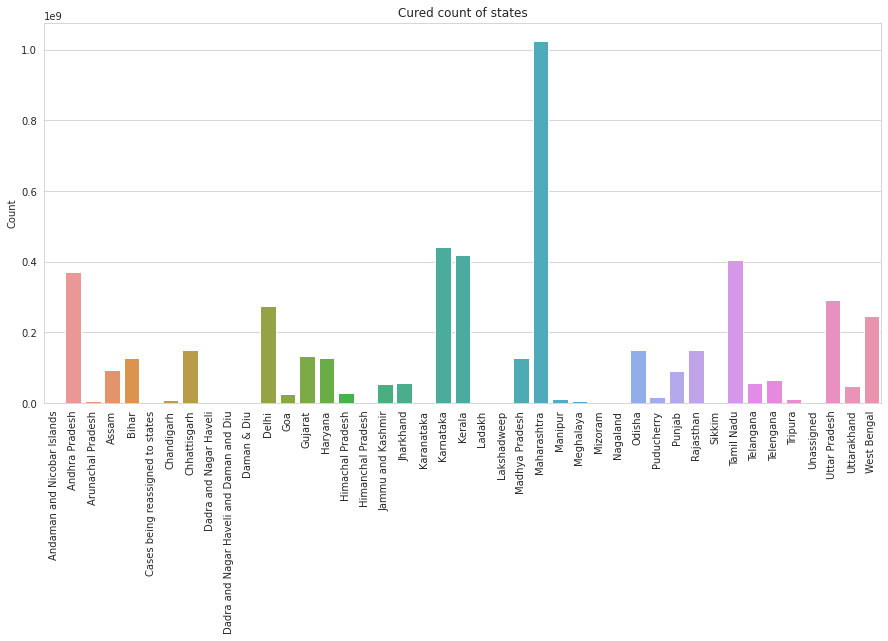

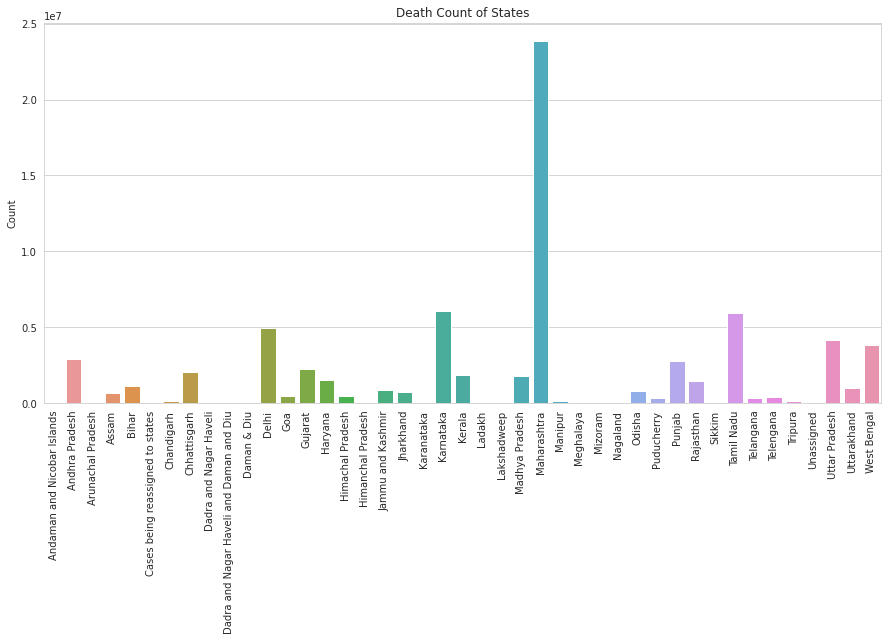

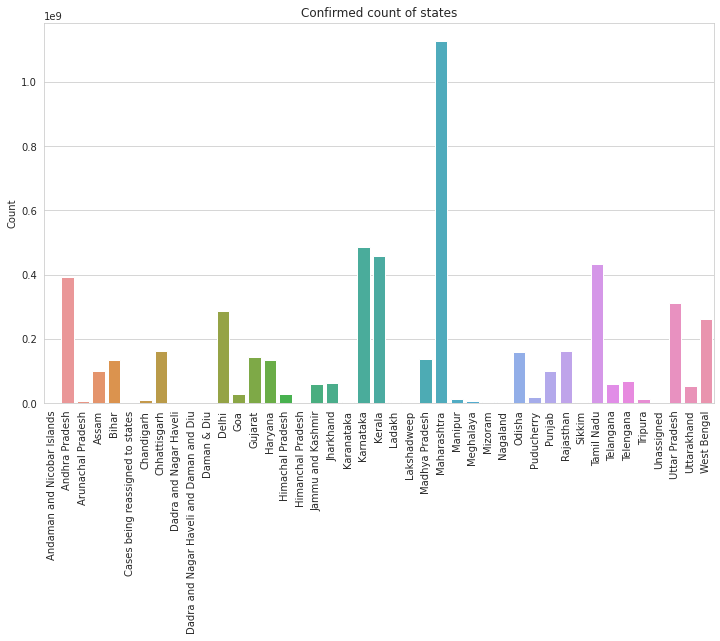

In [10]:
fig=plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
ax = sns.barplot(x=df_s.index, y='Cured', data=df_s, ci=None) #We don't want error bars so ci=None
plt.xticks(fontsize='medium',rotation=90)
plt.title("Cured count of states")
plt.ylabel('Count')
plt.xlabel("")
plt.show()

fig=plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
ax = sns.barplot(x=df_s.index, y='Deaths', data=df_s, ci=None) #We don't want error bars so ci=None
plt.xticks(fontsize='medium',rotation=90)
plt.title("Death Count of States")
plt.xlabel("")
plt.ylabel('Count')
plt.show()


fig=plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
ax = sns.barplot(x= df_s.index, y='Confirmed', data=df_s, ci=None) #We don't want error bars so ci=None
plt.xticks(fontsize='medium',rotation=90)
plt.title("Confirmed count of states")
plt.xlabel("")
plt.ylabel('Count')
plt.show()


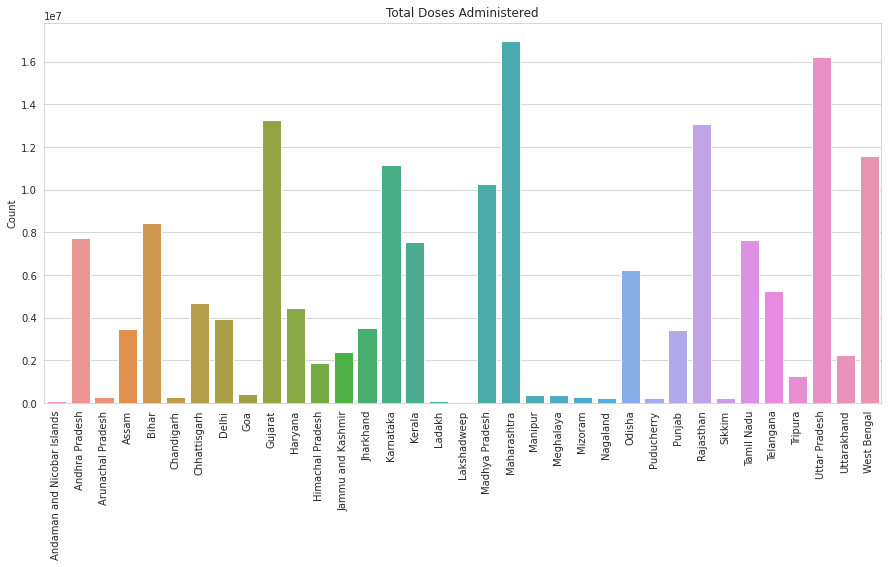

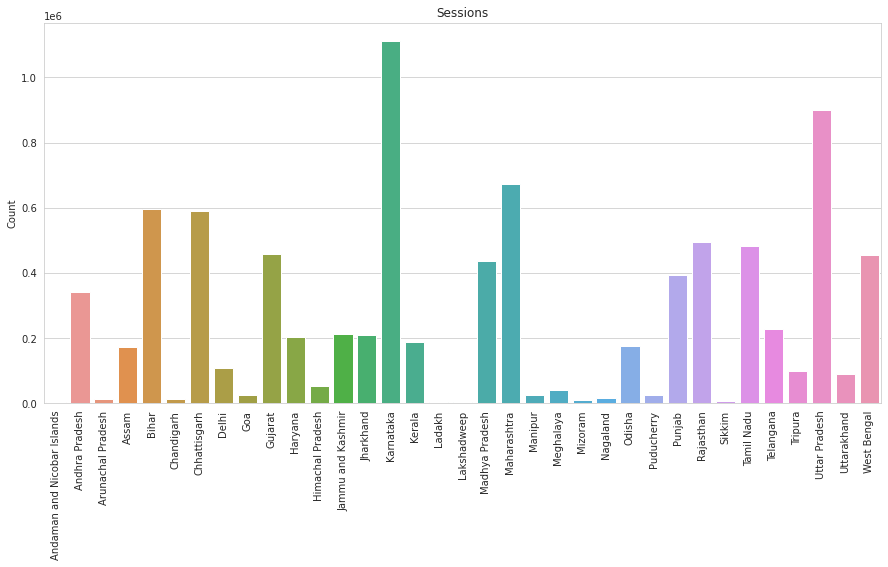

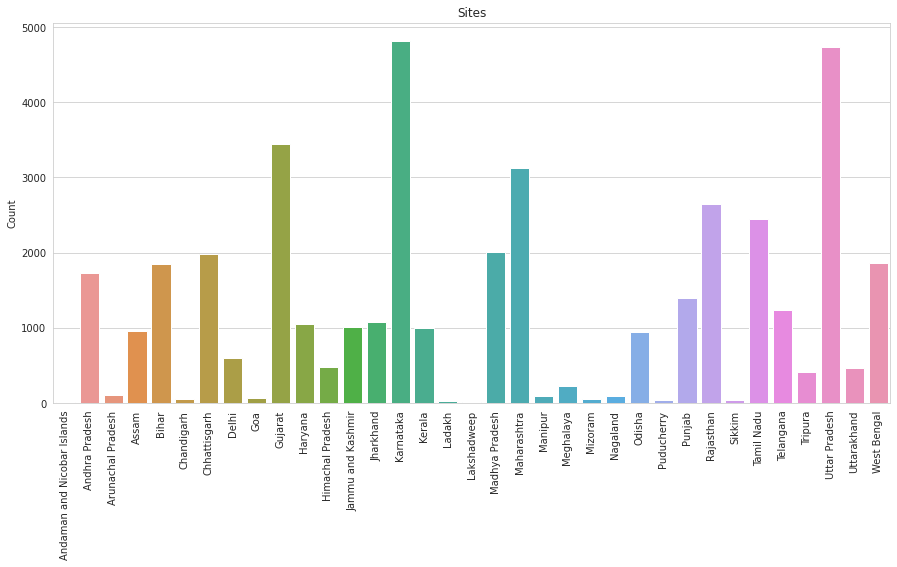

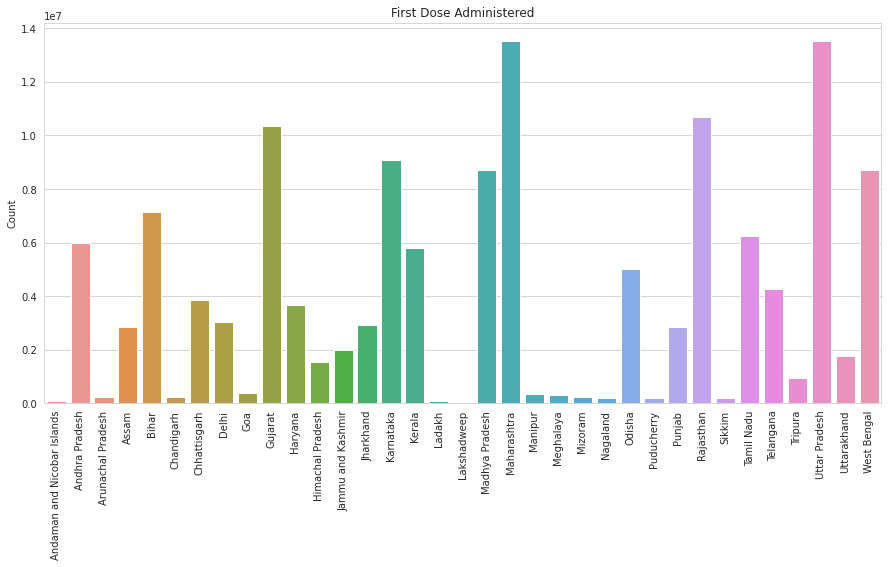

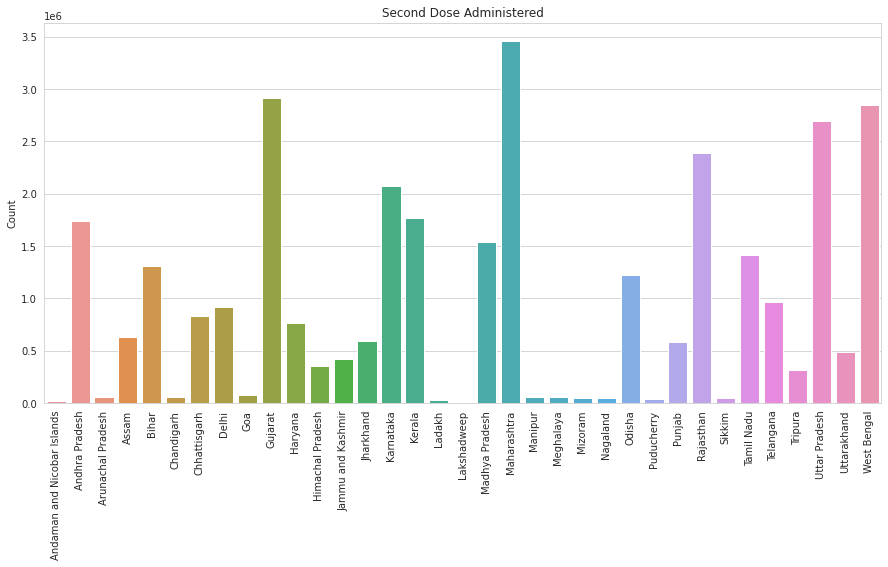

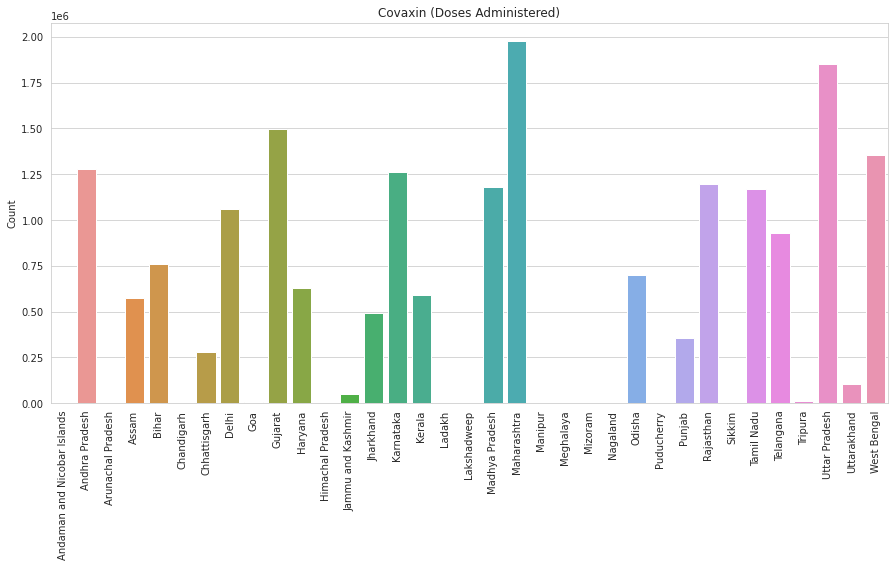

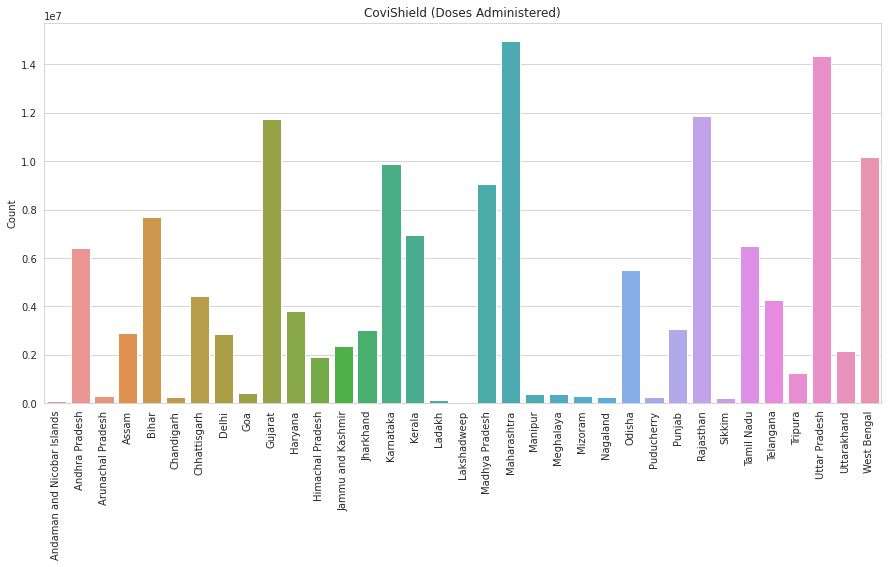

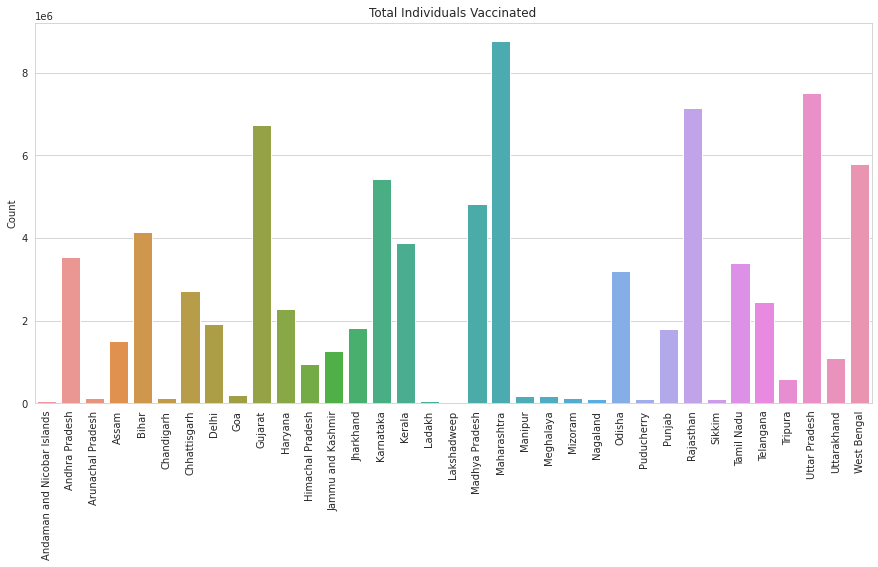

In [11]:
plt_data=df_ind_vaccine
plt_data=plt_data[plt_data['State']!= 'India'] #Using vectorization instead of dropping
for a in plt_data.columns[2:plt_data.shape[1]]:
    fig=plt.figure(figsize=(15,7))
    sns.set_style('whitegrid')
    ax = sns.barplot(x='State', y=a, data=plt_data, ci=None) #We don't want error bars so ci=None
    plt.xticks(fontsize='medium',rotation=90)
    plt.title(a)
    plt.ylabel('Count')
    plt.xlabel("")
    plt.show()


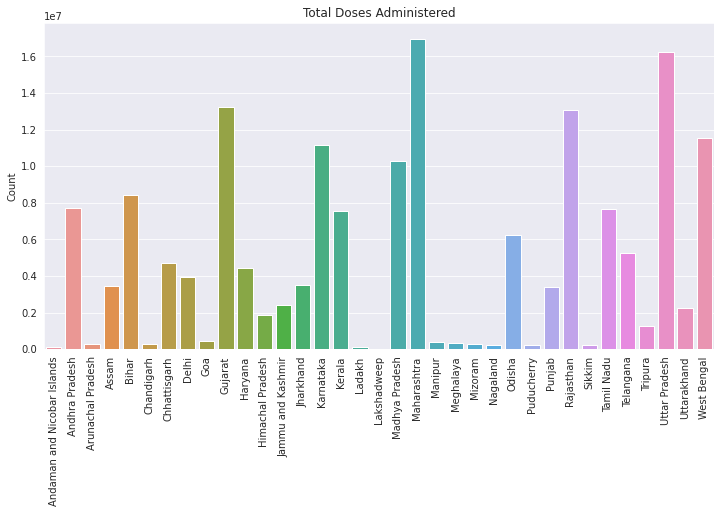

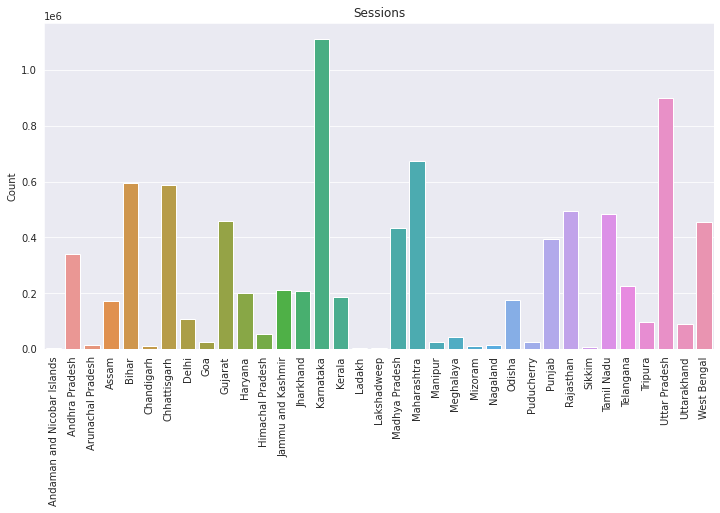

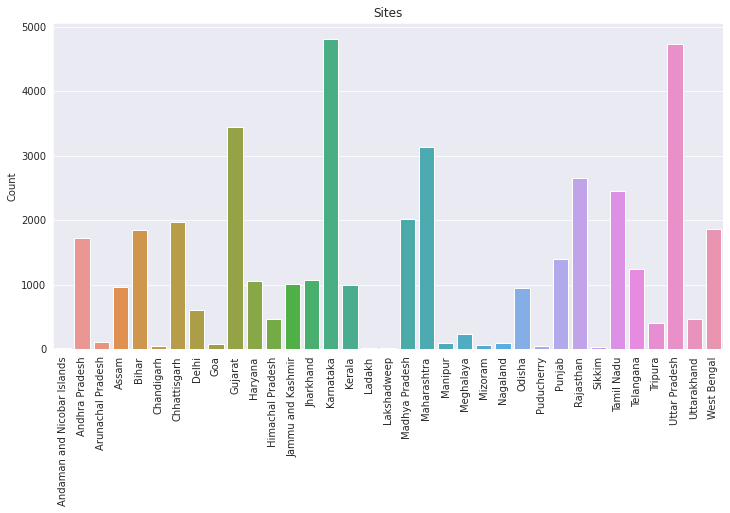

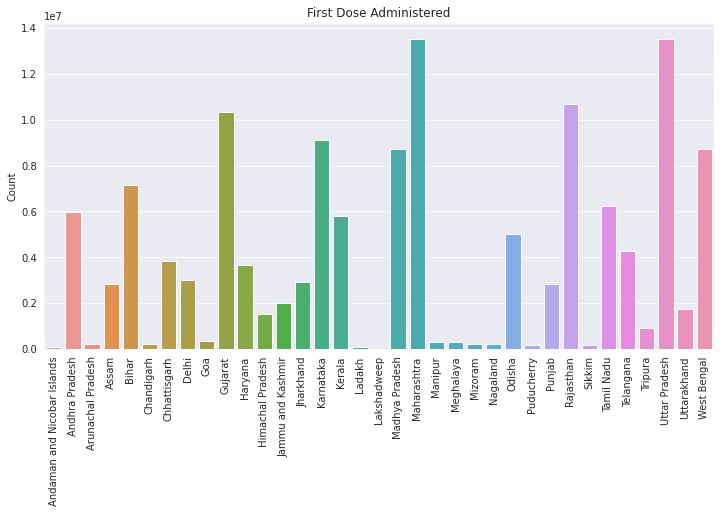

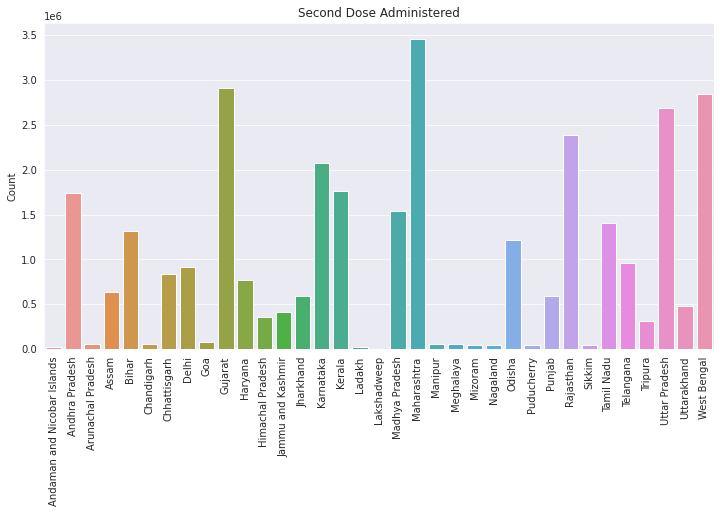

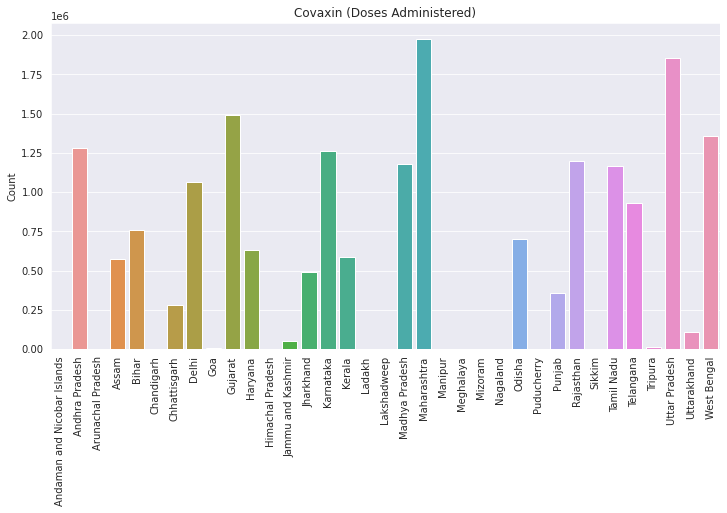

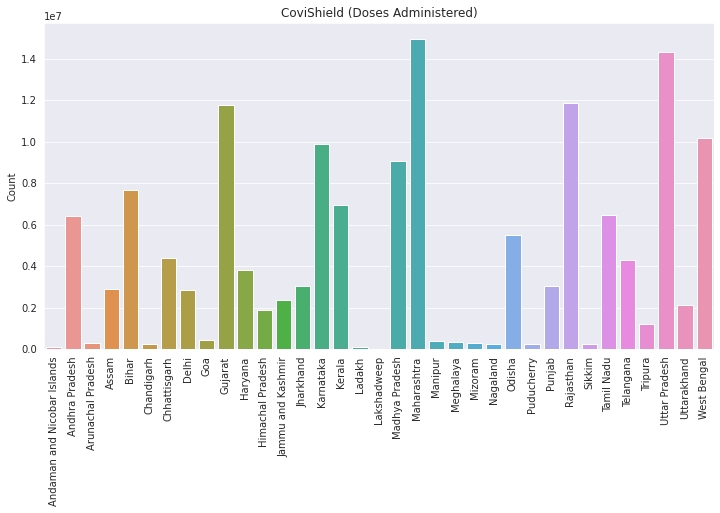

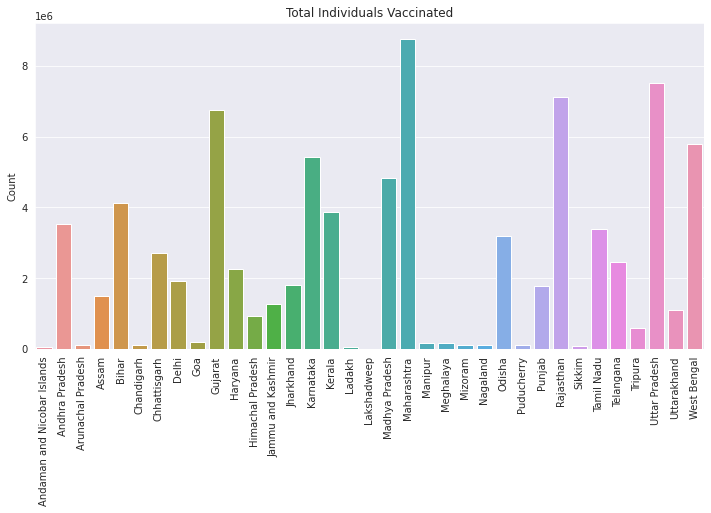

In [12]:
for a in plt_data.columns[2:plt_data.shape[1]]:
    fig=plt.figure(figsize=(12,6))
    sns.set_style('darkgrid')
    ax = sns.barplot(x='State', y=a, data=plt_data, ci=None) #We don't want error bars so ci=None
    plt.xticks(fontsize='medium',rotation=90)
    plt.title(a)
    plt.ylabel('Count')
    plt.xlabel("")
    plt.show()



**Statistics of data**

In [13]:
df_ind.describe()

,Cured,Deaths,Confirmed
count,1.811000e+04,18110.000000,1.811000e+04
mean,2.786375e+05,4052.402264,3.010314e+05
std,6.148909e+05,10919.076411,6.561489e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.360250e+03,32.000000,4.376750e+03
50%,3.336400e+04,588.000000,3.977350e+04
75%,2.788698e+05,3643.750000,3.001498e+05
max,6.159676e+06,134201.000000,6.363442e+06


In [14]:
df_ind_vaccine.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Covaxin (Doses Administered),CoviShield (Doses Administered),Total Individuals Vaccinated
count,7.416000e+03,7.416000e+03,7416.000000,7.416000e+03,7.416000e+03,7.416000e+03,7.416000e+03,5.760000e+03
mean,9.437009e+06,4.921011e+05,2344.485572,7.614841e+06,1.822168e+06,1.073547e+06,8.346047e+06,4.671409e+06
std,3.794578e+07,1.936164e+06,7366.291087,3.033868e+07,7.668636e+06,4.509948e+06,3.341017e+07,1.857800e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00
25%,1.529450e+05,6.222500e+03,77.000000,1.298795e+05,1.414300e+04,0.000000e+00,1.478735e+05,8.022750e+04
50%,8.861205e+05,5.210600e+04,653.000000,7.562120e+05,1.517645e+05,1.926950e+04,8.347875e+05,4.378815e+05
75%,6.951491e+06,3.581850e+05,1762.250000,5.636095e+06,1.226872e+06,8.121522e+05,6.127877e+06,3.693236e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,6.236742e+07,4.468251e+08,2.506569e+08


**Entropy of discrete variables** 

In [15]:
def entropy(p):
    frequency= pd.Series(df_ind_vaccine['State']).value_counts(normalize=True, sort=False) #Counts the probablity of occurence of each discrete quantity in the column
    return -(frequency * np.log(frequency)).sum()

print(entropy(df_ind_vaccine['State']))
print(entropy(df_ind['State/UnionTerritory']))

3.5835189384561104
3.5835189384561104


**Correlation between the variables**

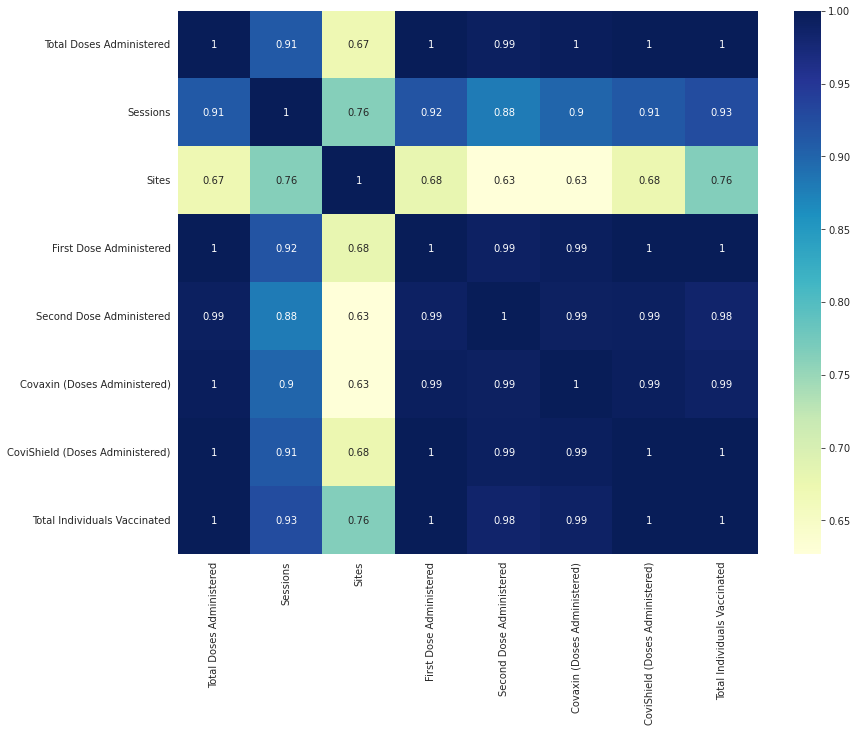

In [16]:
fig=plt.figure(figsize=(13, 10))
con_vars2=np.array(df_ind_vaccine.columns)
con_vars2=np.delete(con_vars2,0)
con_vars2=np.delete(con_vars2,0)
sns.heatmap(df_ind_vaccine[con_vars2].corr(), annot=True, cmap='YlGnBu')
plt.savefig('Vaccine_corr.jpeg', bbox_inches='tight')
plt.show()


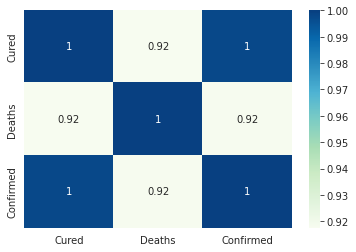

In [17]:
fig=plt.figure(figsize=(6,4))
con_vars1=np.array(df_ind.columns)
con_vars1=np.delete(con_vars1,0)
con_vars1=np.delete(con_vars1,0)
sns.heatmap(df_ind[con_vars1].corr(),cmap='GnBu', annot=True)
plt.show()


This signifies a very large correlation between few pairs of variables which can perhaps while using regression techniques.

**Histograms for continuous variables**

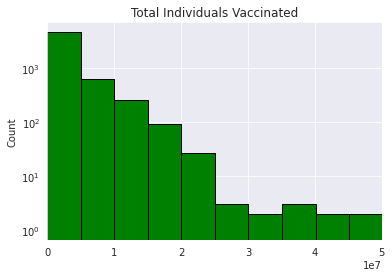

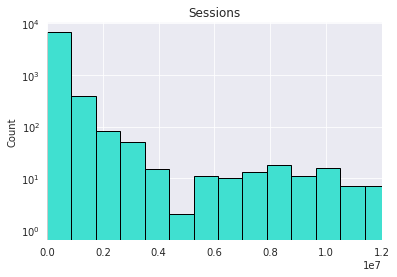

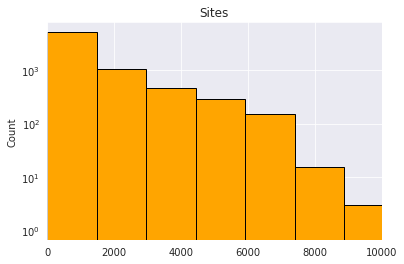

In [18]:
list=['Total Individuals Vaccinated','Sessions','Sites']
sns.set_style("darkgrid")
#PLOT 1 
df_ind_vaccine.hist(list[0], bins=50, edgecolor="black", color="green") 
plt.xlim(0, 50000000)
plt.ylabel("Count")
plt.yscale('log')
plt.show()
print(" ")


#PLOT 2
df_ind_vaccine.hist(list[1], bins=40, edgecolor="black", color="turquoise") 
plt.xlim(0, 12000000)
plt.ylabel("Count")
plt.yscale('log')
plt.show()
print(" ")

#PLOT 3
df_ind_vaccine.hist(list[2], bins=50, edgecolor="black", color="orange") 
plt.xlim(0, 10000)
plt.ylabel("Count")
plt.yscale('log')
plt.show()
print(" ")

These histograms are the frequency histogram which depict the number of occurences of the class on x-axis in the entire dataset.

**QQ Plots**

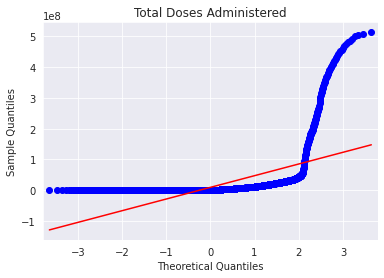

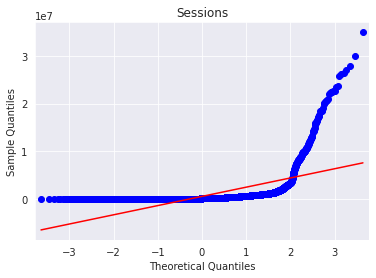

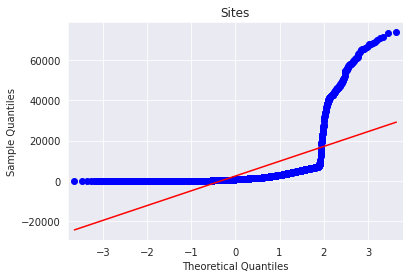

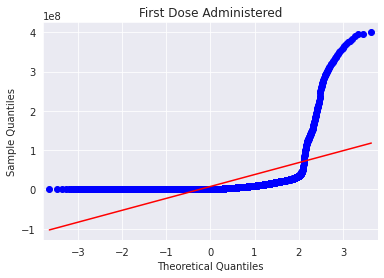

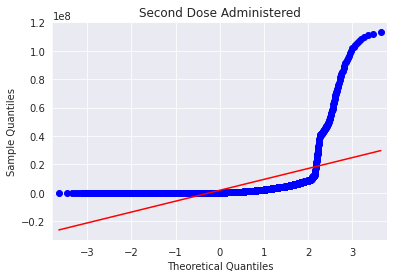

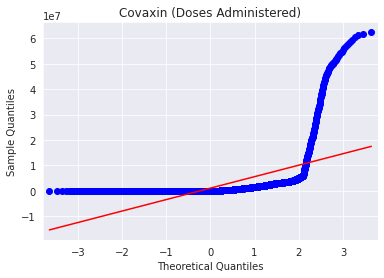

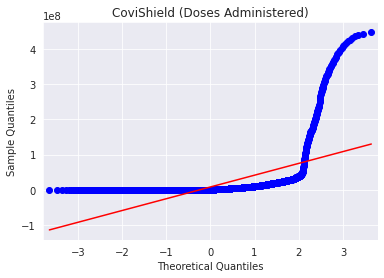

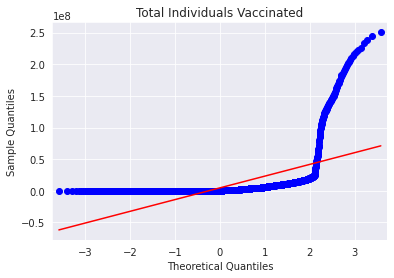

In [19]:
import statsmodels.api as sm   #QQ plot
plt.figure(figsize=(10,7))
sns.axes_style("darkgrid")
for col in con_vars2:
    %matplotlib inline
    fig = sm.qqplot(df_ind_vaccine[col].dropna(), line='s')
    plt.title(col)
    plt.show();

**Line Plots**

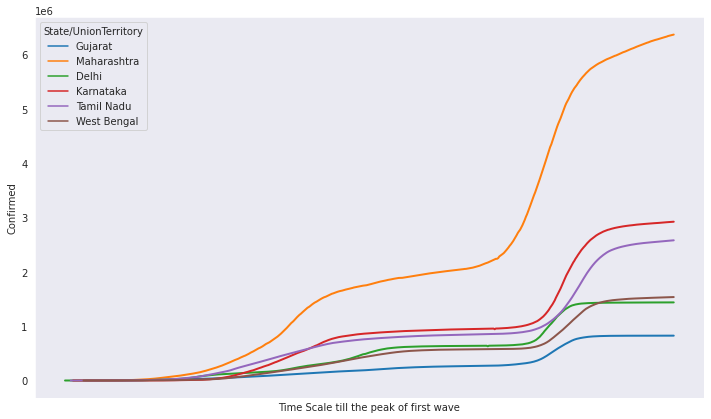

In [20]:
date_list=['2020-04-01','2020-05-01','2020-06-01','2020-06-15','2020-07-01','2020-08-01']
state_list=['Gujarat','Maharashtra','Delhi','Karnataka', 'Tamil Nadu','West Bengal']
df_states=df_ind.loc[df_ind['Date'].isin(date_list)]
df_states=df_ind.loc[df_ind['State/UnionTerritory'].isin(state_list)]
sns.set_style("dark")
sns.axes_style('whitegrid')
fig, ax = plt.subplots(figsize = (12, 7))
sns.lineplot(ax=ax,data=df_states, x="Date", y="Confirmed", hue="State/UnionTerritory", 
             ci=95, hue_order=state_list,linewidth='2' );
#plt.title('Daily Cases in selected States', fontsize=15, weight='bold')
plt.xlabel("Time Scale till the peak of first wave")
ax.tick_params(labelbottom=False) 
plt.savefig('ind_states_daily.jpeg', bbox_inches='tight')
plt.show()

In [21]:
#files.download('ind_states_daily.jpeg')

## **Regression Techniques** for the vaccine data

Here we merge data from two useful datasets, to apply it for Linear regression. Using the 5 parameters:


*   New Cases
*   Active Cases
* Cured
* Singly Vaccinated persons
* Fully Vaccinated persons, 
we attempt to predict the **number of deaths** through these three regression models:

1.   Linear Regression
2. Polynomial Regression
2.   LASSO Regression
3. Ridge Regression





In [22]:
df0=pd.read_csv('/content/COVID-19 Cases(16-11-2021).csv').iloc[0:206]
df0.drop(df0.columns[2], axis=1, inplace=True) 
df0.drop(df0.columns[2], axis=1, inplace=True) 
df0=df0.rename(columns={'Cured.1':'Cured', 'Death.1':'Death'})
df0c=df_ind_vaccine[df_ind_vaccine['State']=='India'].drop(columns=['Total Doses Administered','State','Sessions','Sites','Covaxin (Doses Administered)','CoviShield (Doses Administered)','Total Individuals Vaccinated'])

df=pd.concat([df0c,df0],axis=1)
display(df)

,Updated On,First Dose Administered,Second Dose Administered,New Cases,Active Cases,Cured,Death
0,16/01/2021,48276.0,0.0,9121,136872,11500,98
1,17/01/2021,58604.0,0.0,11610,136549,11833,100
2,18/01/2021,99449.0,0.0,12881,137342,11987,101
3,19/01/2021,195525.0,0.0,13193,139542,10896,97
4,20/01/2021,251280.0,0.0,13993,143127,10307,101
...,...,...,...,...,...,...,...
201,05/08/2021,382658786.0,108102152.0,27176,351087,38012,284
202,06/08/2021,390344882.0,109742188.0,-144518,342223,-132796,-2858
203,07/08/2021,394599261.0,111187777.0,245153,340639,242847,3890
204,08/08/2021,395961470.0,111766433.0,30773,332158,38945,309


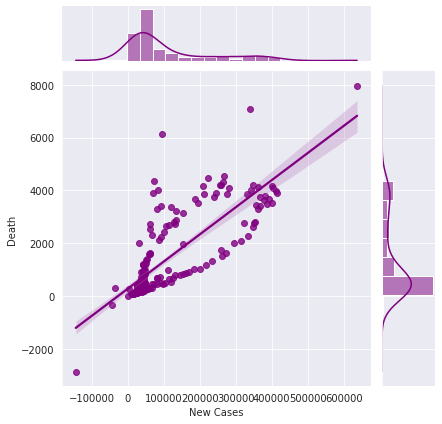

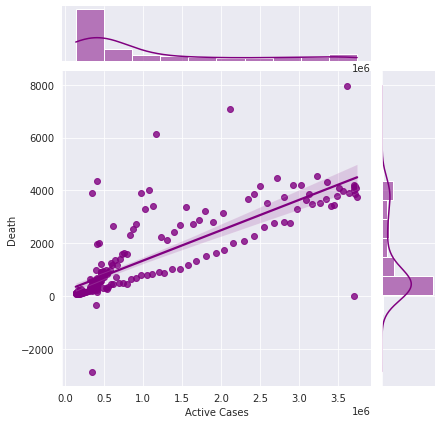

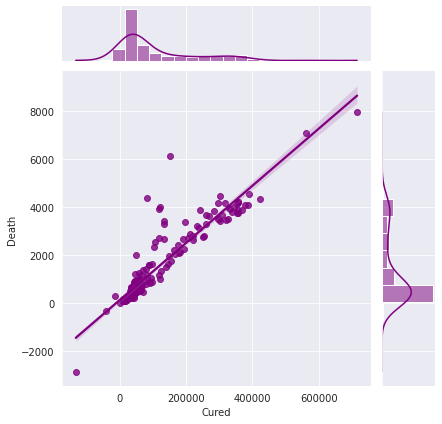

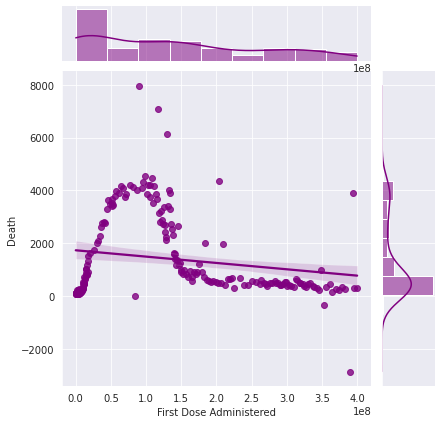

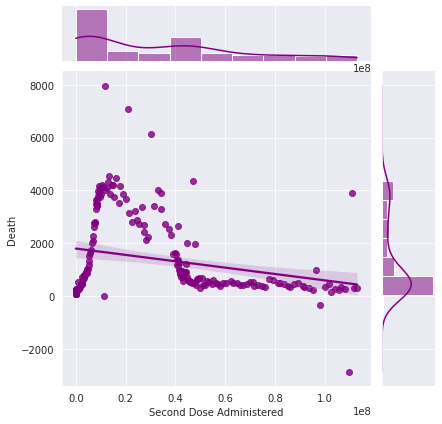

In [23]:
independent_params=['New Cases','Active Cases','Cured','First Dose Administered','Second Dose Administered']
fig=plt.figure(figsize=(6,5))
for a in independent_params:
  %matplotlib inline
  sns.set_style('darkgrid')
  sns.jointplot(color='purple',y='Death', x=a,kind='reg', data=df)
  plt.show();

**Defining** the **X,Y split** along with training and testing data

In [24]:
from sklearn import metrics 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split

In [25]:
x_train, x_test, y_train,y_test=train_test_split(df[independent_params],df['Death'],test_size=0.2) #80-20 split

#Scaling the data such that ecah column represents a normal distribution with 0 mean and unit variance
train_scaler=preprocessing.StandardScaler().fit(x_train)
x_train_scaled=train_scaler.transform(x_train)

test_scaler=preprocessing.StandardScaler().fit(x_test)
x_test_scaled=test_scaler.transform(x_test)

Implementing **batch gradient descent** from scratch

In [26]:
def batch_descent_gradient(X,Y,W,alpha,n_iters):
  # Terms
  # X= dataset matrix ; Y= target column vector ; W= Coefficients column vector ; alpha = learning rate ; n_iters = number of iterations
  
  #Quick calculations
  n_features=X.shape[0] #no. of rows of X
 
  #The math of BGD

  loss_data={} 
  W_data={}

  for i in range(n_iters):

    prediction_function = np.dot(X,W)
    loss_function= np.linalg.norm(Y-prediction_function, axis=0)/(2*n_features)

    loss_data[i]=loss_function #loss function for plotting
    #Updating the coefficients based on the learning parameter
    W=W -(alpha/n_features) * np.dot(prediction_function - Y,X)
    W_data[i]=W

  return W,loss_data,W_data

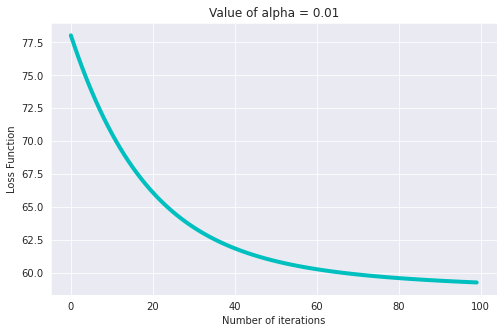

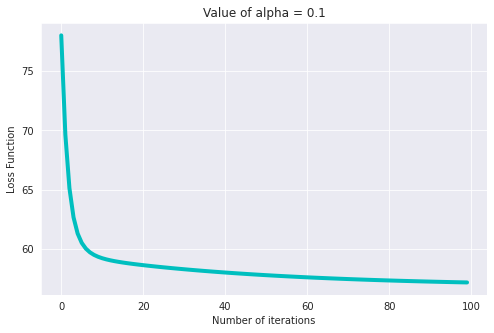

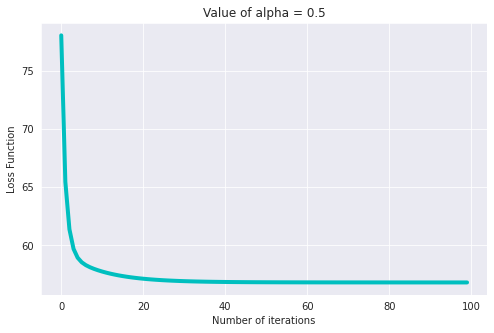

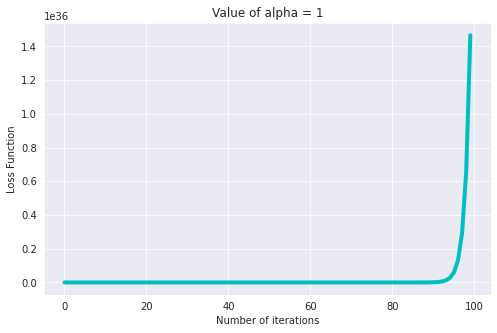

In [27]:
a_list=[0.01,0.1,.5,1]
sns.set_style("darkgrid")
for a in a_list:
  batch_W, n_loss_data,w_data=batch_descent_gradient(x_train_scaled,y_train,np.ones(5),a,1000)
  fig=plt.figure(figsize=(8,5))
  lists = sorted(n_loss_data.items()) # sorted by key, return a list of tuples
  x, y = zip(*lists)

  plt.plot(x[0:100],y[0:100],color='c',linewidth=4)
  plt.xlabel("Number of iterations")
  plt.ylabel("Loss Function")
  plt.title("Value of alpha = " + str(a))
  plt.show()


In [28]:
for a in a_list:
  print(batch_descent_gradient(x_train_scaled,y_train,np.ones(5),a,1000)[0])
 

[  45.85558915   94.44931716 1211.97137626   68.28476056  -11.51266382]
[-160.21536268 -106.96251032 1612.56179881  -63.32830233   72.70589849]
[-171.71238489  -98.76082604 1620.47698608 -139.09527419  149.04078061]
[nan nan nan nan nan]


Thus alpha=1, overshoots the minima, and gives infinity as the loss function for greater number of n_iterations.

**1] Linear Regression**

In [29]:
lr=linear_model.LinearRegression()
lr.fit(x_train_scaled,y_train)
y_predict=lr.predict(x_test_scaled)
print("R2-Score of Linear Regression is",r2_score(y_test,y_predict))
print("RMSE of Linear Regression (train) is", mean_squared_error(y_train,lr.predict(x_train_scaled),squared=False))
print("RMSE of Linear Regression (test) is", mean_squared_error(y_test,y_predict,squared=False))


R2-Score of Linear Regression is 0.8192541552544763
RMSE of Linear Regression (train) is 541.6041245963842
RMSE of Linear Regression (test) is 784.2285199817022


As R2 score is so close 1, the data has a great deal of linear dependence on the features as one naturally expects the number of deaths to be linearly related to vaccinated, confirmed cases,etc.

**2] Polynomial Regression**

In [30]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x_train_scaled)
x_test_poly= poly.fit_transform(x_test_scaled)
poly.fit(x_train_scaled,y_train)

lr_poly=linear_model.LinearRegression()
lr_poly.fit(x_poly,y_train)
y_poly_pred=lr_poly.predict(x_test_poly)

print("R2-score of Polynomial Regression is", r2_score(y_test,y_poly_pred))
print("RMSE of Linear Regression (train) is", mean_squared_error(y_train,lr_poly.predict(x_poly),squared=False))
print("RMSE of Polynomial Regression (test) is", mean_squared_error(y_test,y_poly_pred, squared=False))

R2-score of Polynomial Regression is 0.8973634475073661
RMSE of Linear Regression (train) is 442.94096453328234
RMSE of Polynomial Regression (test) is 590.9619229987824


In [31]:
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x_train_scaled)
x_test_poly= poly.fit_transform(x_test_scaled)
poly.fit(x_train_scaled,y_train)

lr_poly=linear_model.LinearRegression()
lr_poly.fit(x_poly,y_train)
y_poly_pred=lr_poly.predict(x_test_poly)

print("R2-score of Polynomial Regression is", r2_score(y_test,y_poly_pred))
print("RMSE of Polynomial Regression is", mean_squared_error(y_test,y_poly_pred, squared=False))

R2-score of Polynomial Regression is -8.489102080694424
RMSE of Polynomial Regression is 5682.259070898609


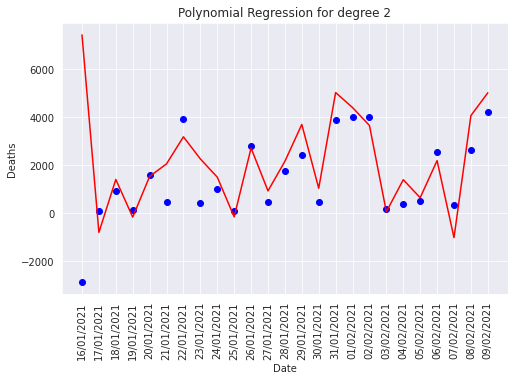

In [32]:
fig=plt.figure(figsize=(8,5))
x_axis=df.iloc[0:25,0]
# Visualising the Polynomial Regression results
plt.scatter(x_axis, y_test[0:25], color = 'blue')
 
plt.plot(x_axis,y_poly_pred[0:25], color = 'red')
plt.title('Polynomial Regression for degree 2')
plt.xticks(fontsize='medium',rotation=90)
plt.xlabel('Date')
plt.ylabel('Deaths')
 
plt.show()

**3] LASSO Regression and 4] Ridge Regression** using

*  **Preprocessing**-Polynomial Features
*   **Hyperparameter tuning** - GridSearch CV



In [33]:
lasso_params={'fit__alpha':[0.1,0.2,0.5,0.75,1]} #List of alpha values to be tested for lasso
ridge_params={'fit__alpha':[50,100,250,500,750]}    #List of alpha values to be tested for ridge

#testing models function

    


def test_models_r2(models, x1,x2,y1,y2, iterations = 100):
  r2_result={}
  
  for i in models:
    r2_test = []
    
    for j in range(iterations):
      r2_test.append(metrics.r2_score(y2, models[i].fit(x1, y1).predict(x2)))
     
      
  r2_result[i] = np.mean(r2_test)
  return r2_result



def test_models_rmse(models, x1,x2,y1,y2, iterations = 100):

  rmse_result_train={}
  rmse_result_test={}
  

  for i in models:
    rmse_train = []
    rmse_test = []
    
    

    for j in range(iterations):
      rmse_test.append(metrics.mean_squared_error(y2, models[i].fit(x1, y1).predict(x2)))
      rmse_train.append(metrics.mean_squared_error(y1, models[i].fit(x1, y1).predict(x1)))
     
      
  rmse_result_train["Train RMSE for " + str(i)]=np.mean(rmse_train)
  rmse_result_test["Test RMSE for " + str(i)] = np.mean(rmse_test)
  
  
  return rmse_result_train,rmse_result_test


In [34]:
pipe_lasso = Pipeline([('poly', PolynomialFeatures()), ('fit', linear_model.Lasso())])
pipe_ridge = Pipeline([('poly', PolynomialFeatures()), ('fit', linear_model.Ridge())])

model1 = {'Lasso': GridSearchCV(pipe_lasso, param_grid=lasso_params).fit(x_train_scaled, y_train).best_estimator_ ,}
model2={'Ridge': GridSearchCV(pipe_ridge, param_grid=ridge_params).fit(x_train_scaled, y_train).best_estimator_,}


In [35]:
display(test_models_r2(model1,x_train_scaled,x_test_scaled,y_train,y_test))
print(" ")
display(test_models_r2(model2,x_train_scaled,x_test_scaled,y_train,y_test))

{'Lasso': 0.9044585738412304}

{'Ridge': 0.7964030541030742}

In [36]:
display(test_models_rmse(model1,x_train_scaled,x_test_scaled,y_train,y_test))

({'Train RMSE for Lasso': 201062.25019752406},
 {'Test RMSE for Lasso': 325093.78154176706})

In [37]:
display(test_models_rmse(model2,x_train_scaled,x_test_scaled,y_train,y_test))

({'Train RMSE for Ridge': 346531.40194844216},
 {'Test RMSE for Ridge': 692768.610571039})